# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Irvan Arfirza
- **Email:** firzzairvn@gmail.com
- **ID Dicoding:** firzairvan

## Menentukan Pertanyaan Bisnis

- Berdasarkan data tersebut daerah mana yang paling berisiko atau memiliki kualitas udara yang paling buruk berdasarkan konsentrasi PM2.5?
- Bagaimana pola perubahan kualitas udara PM2.5 berdasarkan waktu (harian, bulanan, dan musiman)?
- Seberapa sering kualitas udara berada pada kategori tidak sehat berdasarkan standar PM2.5?

## Import Semua Packages/Library yang Digunakan

In [2]:
pip install streamlit-folium -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.7/523.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.7 MB/s eta 0:00:00


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

import folium

## Data Wrangling

### Gathering Data

In [17]:
# Merge data jika gunakan google colab
def merge_dataset():
    all_dfs = []
    original_dir = os.getcwd()
    os.chdir("/content/Dataset")
    for file in os.listdir():
        if file.endswith('.csv'):
            aux = pd.read_csv(file)
            all_dfs.append(aux)
    os.chdir(original_dir)
    if all_dfs:
        df = pd.concat(all_dfs, ignore_index=True)
    else:
        df = pd.DataFrame()
    return df


df=merge_dataset()

df.to_csv(f"China_airQuality.csv", index=False)

In [18]:
df = pd.read_csv("China_airQuality.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Menampilkan top 5 data.

In [19]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
420764,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
420765,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
420766,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


**Insight:**


---


Berikut adalah penjelasan dari masing-masing fitur data yang ada pada dataset Air Quality.

#### Penjelasan Kolom Dataset PRSA (Air Quality)

### Informasi Waktu & Lokasi
| Kolom | Deskripsi |
|------|----------|
| `No` | Nomor urut data |
| `year` | Tahun pengukuran |
| `month` | Bulan pengukuran |
| `day` | Tanggal pengukuran |
| `hour` | Jam pengukuran (0–23) |
| `station` | Nama stasiun pemantauan kualitas udara |

---

### Polutan Udara
| Kolom | Deskripsi |
|------|----------|
| `PM2.5` | Konsentrasi partikel halus ≤ 2.5 µm (µg/m³) |
| `PM10` | Konsentrasi partikel ≤ 10 µm (µg/m³) |
| `SO2` | Konsentrasi sulfur dioksida (µg/m³) |
| `NO2` | Konsentrasi nitrogen dioksida (µg/m³) |
| `CO` | Konsentrasi karbon monoksida (mg/m³) |
| `O3` | Konsentrasi ozon permukaan (µg/m³) |

---

### Data Meteorologi
| Kolom | Deskripsi |
|------|----------|
| `TEMP` | Suhu udara (°C) |
| `PRES` | Tekanan udara (hPa) |
| `DEWP` | Titik embun (°C) |
| `RAIN` | Curah hujan (mm) |
| `wd` | Arah angin |
| `WSPM` | Kecepatan angin (m/s) |

---

**Catatan:**  
Dataset ini mencatat kondisi kualitas udara dan cuaca **per jam** di masing-masing stasiun. Variabel meteorologi (termasuk `WSPM`) berpengaruh terhadap sebaran dan akumulasi polutan udara.

---
## **Tambahan Informasi**
Informasi terkait ambang batas masing-masing polutan udara.

### PM2.5 (µg/m³)
| Kategori | Rentang |
|---------|---------|
| Baik | 0 – 12 |
| Sedang | 12.1 – 35.4 |
| Tidak Sehat (Sensitif) | 35.5 – 55.4 |
| Tidak Sehat | 55.5 – 150.4 |
| Sangat Tidak Sehat | > 150.4 |

---

### PM10 (µg/m³)
| Kategori | Rentang |
|---------|---------|
| Baik | 0 – 54 |
| Sedang | 55 – 154 |
| Tidak Sehat (Sensitif) | 155 – 254 |
| Tidak Sehat | 255 – 354 |
| Sangat Tidak Sehat | > 354 |

---

### SO₂ (µg/m³)
| Kategori | Rentang |
|---------|---------|
| Baik | 0 – 20 |
| Sedang | 21 – 80 |
| Tidak Sehat | > 80 |

---

### NO₂ (µg/m³)
| Kategori | Rentang |
|---------|---------|
| Baik | 0 – 40 |
| Sedang | 41 – 100 |
| Tidak Sehat | > 100 |

---

### CO (mg/m³ *1000 (µg/m³))
| Kategori | Rentang |
|---------|---------|
| Baik | 0 – 4 /0 - 4000|
| Sedang | 4.5 – 9/ 4500 - 9000|
| Tidak Sehat | > 9 / 9000 |

---

### O₃ (µg/m³)
| Kategori | Rentang |
|---------|---------|
| Baik | 0 – 100 |
| Sedang | 101 – 160 |
| Tidak Sehat | > 160 |


### Assessing Data

In [20]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [21]:
missingValuePercentage = (df.isnull().sum() / len(df)) * 100
print("Persentasi missing value dari masing-masing fitur:")
print(missingValuePercentage[missingValuePercentage > 0].sort_values(ascending=False))

Persentasi missing value dari masing-masing fitur:
CO       4.919813
O3       3.155421
NO2      2.879497
SO2      2.143937
PM2.5    2.076916
PM10     1.532674
wd       0.433018
DEWP     0.095777
TEMP     0.094589
PRES     0.093401
RAIN     0.092688
WSPM     0.075576
dtype: float64


**Insight:**
- Dari Dataset ini ditemukan banyak fitur dataset yang memiliki data yang hilang.
- Persentasi missing value paling tinggi ada pada fitur CO sebanyak 4.9%, mengutip Veridical Data Science Book ketika data < 5% maka boleh didrop namun jika > 5% lakukan evaluasi ulang.

In [22]:
df.duplicated().sum()

np.int64(0)

**Insight:**
- Dari dataset ini tidak ditemukan data yang memiliki duplikasi.

In [23]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Pada fitur PM2.5 ditemukan data aneh dengan value 999 yang jauh melampaui rata-rata diangka 79 dan jauh diambang batas atas yaitu > 150.4.
- Pada fitur PM10 ditemukan data aneh dengan value 999 yang jauh melampaui rata-rata diangka 104 dan jauh diambang batas atas yaitu > 354.
- Pada fitur SO2 ditemukan data aneh dengan value 500 yang jauh melampaui rata-rata diangka 15 dan jauh diambang batas atas yaitu > 80.
- Pada fitur O3 ditemukan data aneh dengan value 1071 dengan rentang aman sampai dengan 160 µg/m³ yanng mana data segitu sudah dianggap bahaya dan jauh dari rerata yaitu 57.


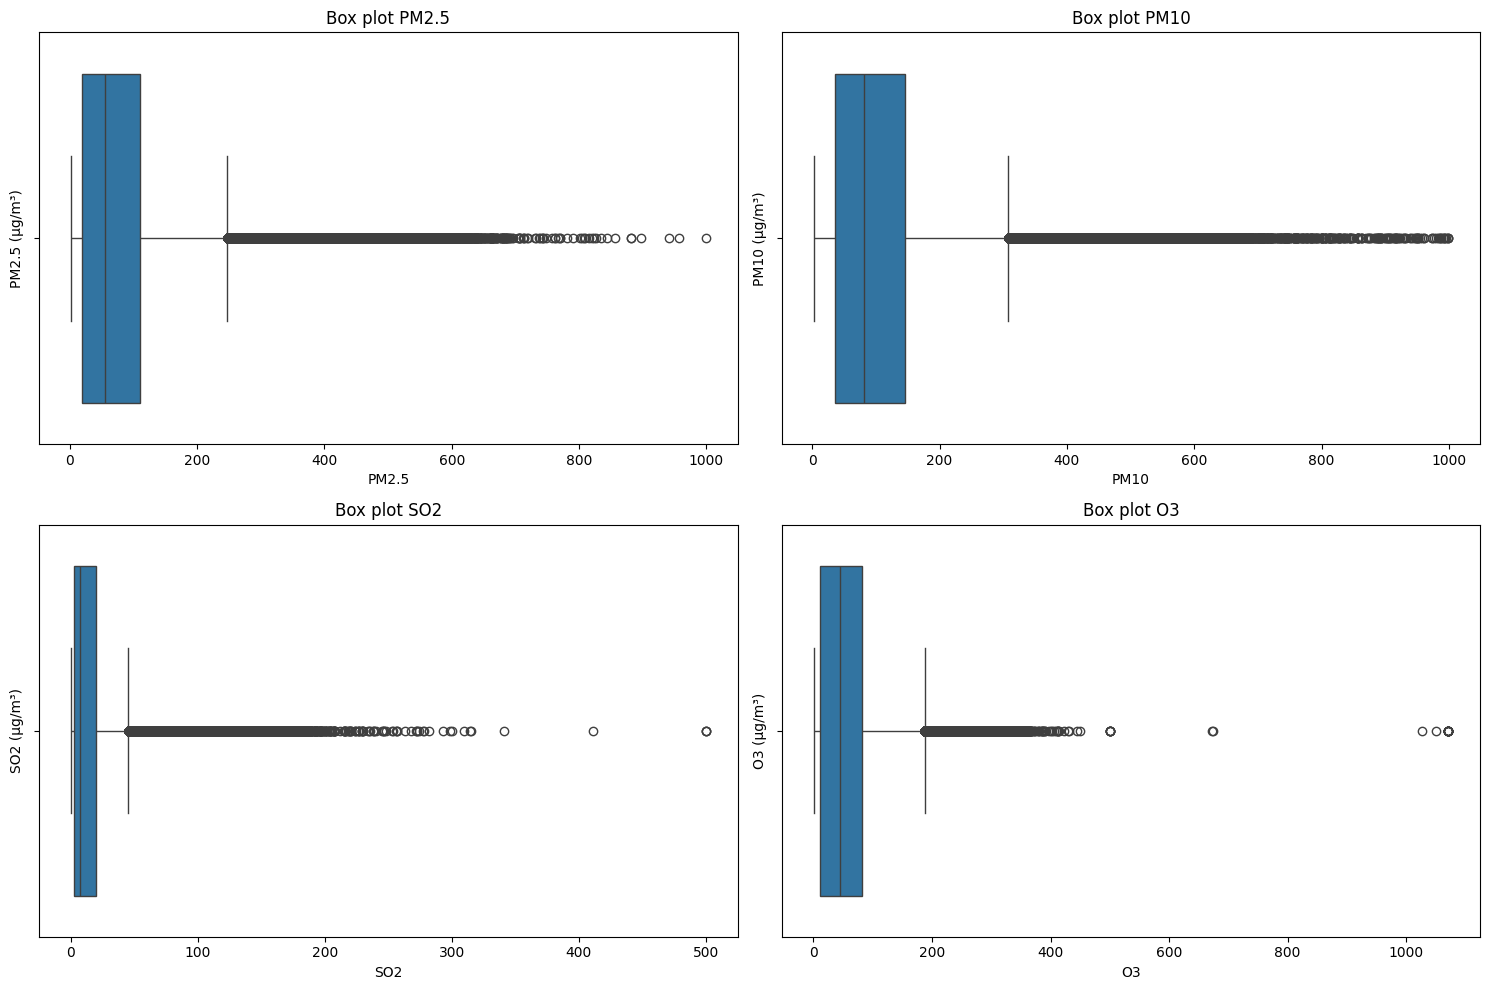

In [24]:
fiturPolutan = ['PM2.5', 'PM10', 'SO2', 'O3']

plt.figure(figsize=(15, 10))
for i, col in enumerate(fiturPolutan):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot {col}')
    plt.ylabel(f'{col} (µg/m³)')
plt.tight_layout()
plt.show()

In [25]:
for col in fiturPolutan:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Total Outlier dari kolom {col}: {len(outliers)}")

Total Outlier dari kolom PM2.5: 19142
Total Outlier dari kolom PM10: 14658
Total Outlier dari kolom SO2: 35566
Total Outlier dari kolom O3: 16599


**Insight:**
- Berdasarkan data ini ditemukan banyak outlier yang terdapat diantara ambang batas bawah dan ambang batas atas.
- Perlu dilakukan penanganan outlier

In [26]:
df_pm25 = df[['year','month','day','hour','PM2.5','station']]
df_pm25

,year,month,day,hour,PM2.5,station
0,2013,3,1,0,6.0,Tiantan
1,2013,3,1,1,6.0,Tiantan
2,2013,3,1,2,6.0,Tiantan
3,2013,3,1,3,6.0,Tiantan
4,2013,3,1,4,5.0,Tiantan
...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,Dingling
420764,2017,2,28,20,13.0,Dingling
420765,2017,2,28,21,9.0,Dingling
420766,2017,2,28,22,10.0,Dingling


**Insight:**
- Untuk menjawab pertanyaan 1,2,3 disini hanya gunakan fitur `year`, `month`, `day`, `hour`, `PM2.5` dan `station` saja dari dataset awal.

In [27]:
df_pm25.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,8739
station,0


**Insight:**
- Berdasarkan data PM2.5 ditemukan 8739 data null atau sekitar 2% dari total keseluruhan data.

In [28]:
df_pm25_null_per_year = df_pm25[df_pm25['PM2.5'].isnull()].groupby('year').size()
print(df_pm25_null_per_year)

year
2013    1231
2014    2860
2015    2127
2016    2257
2017     264
dtype: int64


**Insight:**
- Berdasarkan data null yang ada data berdasarkan tahunan data 2014 paling banyak yang hilang sebanyak 2860

### Cleaning Data

In [29]:
# kordinat diambil dari data di google maps.
station_coordinates = {
    'Aotizhongxin': [25.956934163381177, 117.3681770616395],
    'Changping': [40.22224, 116.24192],
    'Dingling': [40.29285, 116.2259],
    'Dongsi': [39.91632, 116.4164],
    'Gucheng': [26.890965836846178, 100.2620337652272],
    'Guanyuan': [32.433678685529486, 105.84684268266686],
    'Huairou': [40.38601, 116.626],
    'Nongzhanguan': [39.93273, 116.46043],
    'Shunyi': [40.12645, 116.64364],
    'Tiantan': [39.88665, 116.40722],
    'Wanliu': [39.98662, 116.30514],
    'Wanshouxigong': [39.87948, 116.3526],
}

df_pm25['latitude'] = df_pm25['station'].map(lambda x: station_coordinates.get(x, [None, None])[0])
df_pm25['longitude'] = df_pm25['station'].map(lambda x: station_coordinates.get(x, [None, None])[1])

/tmp/ipython-input-746697275.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['latitude'] = df_pm25['station'].map(lambda x: station_coordinates.get(x, [None, None])[0])
/tmp/ipython-input-746697275.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['longitude'] = df_pm25['station'].map(lambda x: station_coordinates.get(x, [None, None])[1])


**Insight:**
- Dari data ini saya coba cari latitude dan longtitude dari masing-masing wilayah untuk membuat mapping di setiap station.
- Fungsi dari mapping ini untuk menggunakan fitur folium dalam visualisasi lokasi data.


In [30]:
df_pm25['datetime'] = pd.to_datetime(df_pm25[['year', 'month', 'day', 'hour']])
df_pm25['day_name'] = df_pm25['datetime'].dt.day_name()
df_pm25['month_name'] = df_pm25['datetime'].dt.month_name()
df_pm25 = df_pm25.set_index('datetime')

df_pm25['PM2.5'] = df_pm25['PM2.5'].ffill().bfill()

print("Jumlah nilai null di kolom PM2.5 setelah imputasi:")
print(df_pm25['PM2.5'].isnull().sum())

Jumlah nilai null di kolom PM2.5 setelah imputasi:
0


/tmp/ipython-input-4147692945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['datetime'] = pd.to_datetime(df_pm25[['year', 'month', 'day', 'hour']])
/tmp/ipython-input-4147692945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['day_name'] = df_pm25['datetime'].dt.day_name()
/tmp/ipython-input-4147692945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

**Insight:**
- Setelah penerapan metode imputasi `ffill()` dan `bfill()`, nilai null di kolom `PM2.5` telah berhasil ditangani (menjadi 0).

In [31]:
avgpm25_perStation = df_pm25.groupby('station')['PM2.5'].mean().sort_values(ascending=False)
avgpm25_perStation_df = avgpm25_perStation.reset_index()
avgpm25_perStation_df.rename(columns={'PM2.5': 'avg_PM2.5'}, inplace=True)
df_pm25 = pd.merge(df_pm25, avgpm25_perStation_df, on='station', how='left')

In [32]:
df_pm25.head()

,year,month,day,hour,PM2.5,station,latitude,longitude,day_name,month_name,avg_PM2.5
0,2013,3,1,0,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892
1,2013,3,1,1,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892
2,2013,3,1,2,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892
3,2013,3,1,3,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892
4,2013,3,1,4,5.0,Tiantan,39.88665,116.40722,Friday,March,82.255892


**Insight:**
- Kode tersebut akan menghitung rerata dari PM2.5 yang dikelompokan disetiap station.

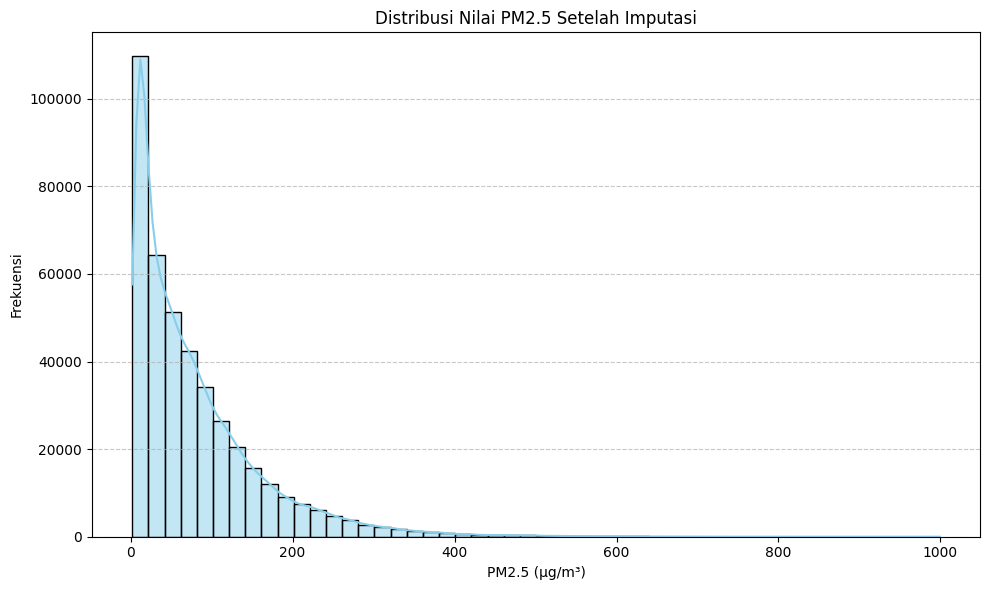

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pm25['PM2.5'], kde=True, bins=50, color='skyblue')
plt.title('Distribusi Nilai PM2.5 Setelah Imputasi')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Histogram di atas menunjukkan distribusi konsentrasi PM2.5 setelah nilai-nilai yang hilang diisi menggunakan metode imputasi deret waktu (`ffill()` dan `bfill()`).
- Kita dapat melihat bagaimana nilai-nilai PM2.5 terdistribusi dan apakah ada perubahan yang signifikan dalam bentuk distribusi dibandingkan dengan sebelum imputasi atau jika ada anomali yang muncul.

In [34]:
def clean_outliers(df, columns):
    initial_rows = df.shape[0]
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

    final_rows = df.shape[0]
    print(f"Jumlah data sebelum menghilangkan outlier: {initial_rows} baris")
    print(f"Jumlah data setelah menghilangkan outlier: {final_rows} baris")
    print(f"Total outlier yang dihapus: {initial_rows - final_rows} baris")
    return df

df_pm25_cleaned = clean_outliers(df_pm25.copy(), ['PM2.5'])

df_pm25 = df_pm25_cleaned

Jumlah data sebelum menghilangkan outlier: 420768 baris
Jumlah data setelah menghilangkan outlier: 401600 baris
Total outlier yang dihapus: 19168 baris


**Insight:**
- Setelah dilakukan pembersihan outlier yang terdapat pada data yang awal mulainya total data sebanyak **420768** rows menjadi **401600** rows dengan total data outlier yang hilang sebanyak **19168** rows.

In [35]:
df_pm25.describe()

,year,month,day,hour,PM2.5,latitude,longitude,avg_PM2.5
count,401600.000000,401600.000000,401600.000000,401600.000000,401600.000000,401600.000000,401600.000000,401600.000000
mean,2014.658745,6.503725,15.719069,11.479151,68.136695,37.167879,114.267042,80.095331
std,1.176675,3.392538,8.798189,6.894492,58.650841,5.237786,5.143765,6.411984
min,2013.000000,1.000000,1.000000,0.000000,2.000000,25.956934,100.262034,67.429857
25%,2014.000000,4.000000,8.000000,6.000000,19.000000,39.879480,116.225900,71.119444
50%,2015.000000,7.000000,16.000000,11.000000,51.000000,39.932730,116.352600,83.047023
75%,2016.000000,9.000000,23.000000,17.000000,101.000000,40.222240,116.626000,84.345203
max,2017.000000,12.000000,31.000000,23.000000,250.000000,40.386010,117.368177,86.310293


**Insight:**
- Setelah dilakukan imputasi terhadap data dan dilakukan menghapusan outlier yang ada pada data bisa lihat bahwa rentang data pada PM2.5 sudah menjadi normal.

## Exploratory Data Analysis (EDA)

In [36]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


**Insight:**
- Berikut adalah keseluruhan informasi yang ada pada data awal.
- Ditemukan banyak data aneh yang ada pada data awal

- Pada fitur PM2.5 ditemukan data aneh dengan value 999 yang jauh melampaui rata-rata diangka 79 dan jauh diambang batas atas yaitu > 150.4.
- Pada fitur PM10 ditemukan data aneh dengan value 999 yang jauh melampaui rata-rata diangka 104 dan jauh diambang batas atas yaitu > 354.
- Pada fitur SO2 ditemukan data aneh dengan value 500 yang jauh melampaui rata-rata diangka 15 dan jauh diambang batas atas yaitu > 80.
- Pada fitur O3 ditemukan data aneh dengan value 1071 dengan rentang aman sampai dengan 160 µg/m³ yanng mana data segitu sudah dianggap bahaya dan jauh dari rerata yaitu 57.

In [56]:
df_pm25.describe()

,year,month,day,hour,PM2.5,latitude,longitude,avg_PM2.5
count,401600.000000,401600.000000,401600.000000,401600.000000,401600.000000,401600.000000,401600.000000,401600.000000
mean,2014.658745,6.503725,15.719069,11.479151,68.136695,37.167879,114.267042,80.095331
std,1.176675,3.392538,8.798189,6.894492,58.650841,5.237786,5.143765,6.411984
min,2013.000000,1.000000,1.000000,0.000000,2.000000,25.956934,100.262034,67.429857
25%,2014.000000,4.000000,8.000000,6.000000,19.000000,39.879480,116.225900,71.119444
50%,2015.000000,7.000000,16.000000,11.000000,51.000000,39.932730,116.352600,83.047023
75%,2016.000000,9.000000,23.000000,17.000000,101.000000,40.222240,116.626000,84.345203
max,2017.000000,12.000000,31.000000,23.000000,250.000000,40.386010,117.368177,86.310293


**Insight:**
- Berbeda dengan data awal, `df_pm25` merupakan variable data yang sudah dilakukan cleaning dan pemfokusan fitur.
- Data pada fitur `PM2.5` sudah memiliki nilai normal dengan maksimum di angka **250 µg/m³** dengan rerata diangka **68 µg/m³**.
- Data untuk rerata disetiap `station` maksimal diangka **86 µg/m³** dengan rerata **80 µg/m³**.

In [37]:
numeric_columns = df.select_dtypes('number')
corr = numeric_columns.corr()
corr.style.background_gradient(cmap='coolwarm')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.969533,0.043181,0.017764,0.000684,-0.023569,-0.044217,-0.226739,-0.046553,0.019660,-0.050868,-0.122409,0.188280,-0.101972,0.004877,0.054214
year,0.969533,1.000000,-0.202010,-0.005569,-0.000000,-0.025836,-0.037723,-0.170246,-0.056270,0.007861,-0.024384,-0.151791,0.186662,-0.164818,0.000975,0.087472
month,0.043181,-0.202010,1.000000,0.010522,-0.000000,0.010438,-0.025380,-0.213898,0.042293,0.046648,-0.103691,0.131323,-0.012795,0.265774,0.016066,-0.139666
day,0.017764,-0.005569,0.010522,1.000000,0.000000,0.003428,0.026015,-0.005146,0.009878,-0.015692,0.002829,0.014390,0.021758,0.023070,-0.003699,-0.011646
hour,0.000684,-0.000000,-0.000000,0.000000,1.000000,0.011709,0.051426,0.029947,-0.001559,-0.031358,0.282287,0.141983,-0.038367,-0.012216,0.012381,0.140486
PM2.5,-0.023569,-0.025836,0.010438,0.003428,0.011709,1.000000,0.884380,0.482354,0.666948,0.789998,-0.149697,-0.131127,0.018566,0.114656,-0.014359,-0.272205
PM10,-0.044217,-0.037723,-0.025380,0.026015,0.051426,0.884380,1.000000,0.462651,0.652193,0.702363,-0.111294,-0.096209,-0.017971,0.070310,-0.026519,-0.183665
SO2,-0.226739,-0.170246,-0.213898,-0.005146,0.029947,0.482354,0.462651,1.000000,0.499496,0.535750,-0.165341,-0.321799,0.223236,-0.266781,-0.040241,-0.108717
NO2,-0.046553,-0.056270,0.042293,0.009878,-0.001559,0.666948,0.652193,0.499496,1.000000,0.705500,-0.471587,-0.278192,0.174167,-0.031599,-0.043785,-0.400460
CO,0.019660,0.007861,0.046648,-0.015692,-0.031358,0.789998,0.702363,0.535750,0.705500,1.000000,-0.313012,-0.326237,0.188195,-0.057129,-0.013342,-0.297511


**Insight:**
- Berdasarkan korelasi data tersebut diketahui bahwa korelasi antara fitur `PM2.5` yang paling tinggi berkorelasi terhadap `PM10` sebesar **0.85** / **85%** korelasi.
- Beberapa fitur yang memiliki korelasi tinggi terhadap fitur `PM2.5` yaitu `PM10`, `SO2`, `NO2`, `CO`, `DEWP` adapun fitur yang memiliki korelasi rendah terhadap fitur tersebut yaitu TEMP hanya sebesar **0.03** / **3%** korelasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan data tersebut daerah mana yang paling berisiko atau memiliki kualitas udara yang paling buruk berdasarkan konsentrasi PM2.5?


In [38]:
avgpm25_perStation = df_pm25.groupby('station')['PM2.5'].mean().sort_values(ascending=False)
print("Rata-rata konsentrasi PM2.5 per stasiun:")
print(avgpm25_perStation)

Rata-rata konsentrasi PM2.5 per stasiun:
station
Dongsi           71.638547
Gucheng          71.412002
Guanyuan         71.013833
Wanliu           70.899047
Wanshouxigong    70.579407
Aotizhongxin     70.437955
Tiantan          70.218446
Nongzhanguan     70.159322
Shunyi           67.797841
Changping        63.032801
Huairou          62.712884
Dingling         58.128466
Name: PM2.5, dtype: float64


**Insight:**
- Diketahui dari data untuk station yang paling banyak memiliki konsentrasi `PM2.5` tertinggi terdapat pada **Dongsi** station sebesar **71.63 µg/m³** lalu disusul dengan **Gucheng** station sebesar **71.41 µg/m³**.
- Station dengan konsentrasi udara paling rendah diangka **58.12 µg/m³** dipegang oleh **Dingling** station.
- Berdasarkan data tersebut diketahui bahwa untuk data terendahnya pun konsentrasi udara yang terdapat pada 12 station masih dapat dikategorikan sebagai konsentrasi **Tidak Sehat**.

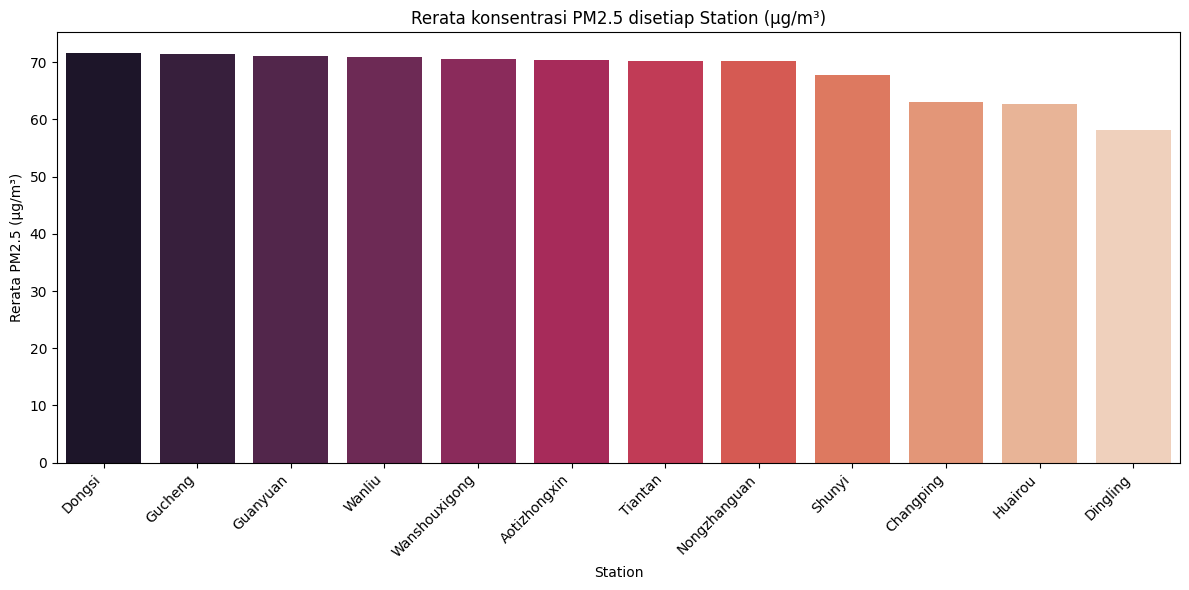

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avgpm25_perStation.index, y=avgpm25_perStation.values, palette='rocket', hue=avgpm25_perStation.index, legend=False)
plt.title('Rerata konsentrasi PM2.5 disetiap Station (µg/m³)')
plt.xlabel('Station')
plt.ylabel('Rerata PM2.5 (µg/m³)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Semakin tinggi `PM2.5` semakin jelek kualitas udaranya.
- Berdasarkan data tersebut daerah yang memiliki kualitas `PM2.5` rata-rata berdasarkan rentang data tahun 2013 - 2017 yaitu **Dongsi**.
- **Dongsi** station mencatatkan data konsentrasi `PM2.5` tertinggi berada pada **71.638547** µg/m³.

**Alasan**:
Untuk mengetahui kualitas udara dari station pemantauan paling buruk, saya akan menghitung rerata konsentrasi `PM2.5` dari masing-masing station yang dilakukan penggrupan berdasarkan 'station' dan akan hitung rerata dari `PM2.5`. Hasil yang muncul akan di urutkan berdasarkan data tertinggi ke terendah untuk memudahkan identifikasi dari masing-masing konsentrasi udara.


In [44]:
folium_map = folium.Map(
    location=[df_pm25['latitude'].mean(), df_pm25['longitude'].mean()],
    zoom_start=5
)

def get_color(pm25_value):
    if pm25_value <= 12:
        return 'green' # Baik
    elif 12.1 <= pm25_value <= 35.4:
        return 'yellow' # Sedang
    elif 35.5 <= pm25_value <= 55.4:
        return 'orange' # Tidak Sehat (Sensitif)
    elif 55.5 <= pm25_value <= 150.4:
        return 'red' # Tidak Sehat
    else:
        return 'darkred' # Sangat Tidak Sehat

for index, row in df_pm25.drop_duplicates(subset=['station']).iterrows():
    lat = row['latitude']
    lon = row['longitude']
    station_name = row['station']
    avg_pm25 = row['avg_PM2.5']

    if pd.isna(avg_pm25):
        continue

    color = get_color(avg_pm25)
    radius = avg_pm25 / 5 + 5

    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f"Station: {station_name}<br>Avg PM2.5: {avg_pm25:.2f} \u00B5g/m\u00B3",
    ).add_to(folium_map)

folium_map

**Insight:**
- Untuk memvisualisasikan data dari masing-masing wilayah saya gunakan geospatial analysis menggunakan folium.


### Pertanyaan 2: Bagaimana pola perubahan kualitas udara PM2.5 berdasarkan waktu (harian, bulanan, dan musiman)?

In [45]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Musim Semi'
    elif 6 <= month <= 8:
        return 'Musim Panas'
    elif 9 <= month <= 11:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'

df_pm25['season'] = df_pm25['month'].apply(get_season)
df_pm25.head()

,year,month,day,hour,PM2.5,station,latitude,longitude,day_name,month_name,avg_PM2.5,season
0,2013,3,1,0,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi
1,2013,3,1,1,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi
2,2013,3,1,2,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi
3,2013,3,1,3,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi
4,2013,3,1,4,5.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi


**Insight:**
China dibagi menjadi 4 musim.
- Musim Semi (Maret - Mei)
- Musim Panas (Juni - Agustus)
- Musim Gugur (September - November)
- Musim Dingin (Desember - Februari)



In [46]:
daily_pm25_pattern = df_pm25.groupby('hour')['PM2.5'].mean()
print("Rata-rata konsentrasi PM2.5 per jam:\n", daily_pm25_pattern.head())

Rata-rata konsentrasi PM2.5 per jam:
 hour
0    72.358141
1    71.357033
2    70.545067
3    69.708606
4    68.508571
Name: PM2.5, dtype: float64


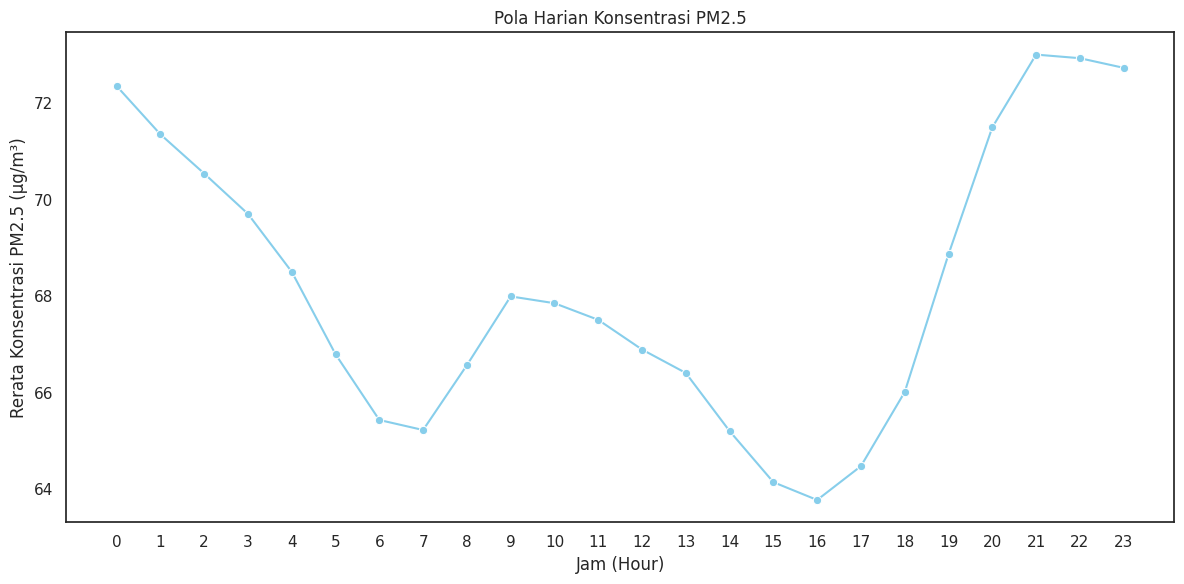

In [47]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="white")
sns.lineplot(x=daily_pm25_pattern.index, y=daily_pm25_pattern.values, marker='o', color='skyblue')
plt.title('Pola Harian Konsentrasi PM2.5')
plt.xlabel('Jam (Hour)')
plt.ylabel('Rerata Konsentrasi PM2.5 (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(False)
plt.tight_layout()
plt.show()

**Insight**:
- Konsentrasi `PM2.5` setelah cenderung mengalami penurunan di pagi hari (mulai jam 00 - 06) pagi setelah itu mengalami kenaikan dijam (07 - 09 pagi) kemungkinan dikarenakan aktivitas dipagi hari padat dijam tersebut.
- Setelah itu, konsentrasi `PM2.5` mulai meningkat kembali pada sore mulai jam 16 hingga malam hari, mencapai puncaknya lagi di malam hari (sekitar jam 19 - 21).
- Pola ini kemungkinan disebabkan oleh kombinasi faktor seperti aktivitas kendaraan di jam sibuk pagi dan sore, kondisi cuaca seperti inversi suhu di pagi hari yang memerangkap polutan, serta penurunan aktivitas industri dan kendaraan di siang hari.

- Puncak konsentrasi `PM2.5` tertinggi terjadi pada dini hari hingga pagi (sekitar jam 00 - 06) dan malam hari (sekitar jam 19 - 21), menunjukkan bahwa periode ini adalah waktu dengan kualitas udara terburuk dalam sehari

In [48]:
monthly_pm25_pattern = df_pm25.groupby('month_name')['PM2.5'].mean()
# Order the months correctly for visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pm25_pattern = monthly_pm25_pattern.reindex(month_order)
print("Rata-rata konsentrasi PM2.5 per bulan:\n", monthly_pm25_pattern.head())

Rata-rata konsentrasi PM2.5 per bulan:
 month_name
January     73.101334
February    65.630022
March       77.801314
April       72.094741
May         61.575783
Name: PM2.5, dtype: float64


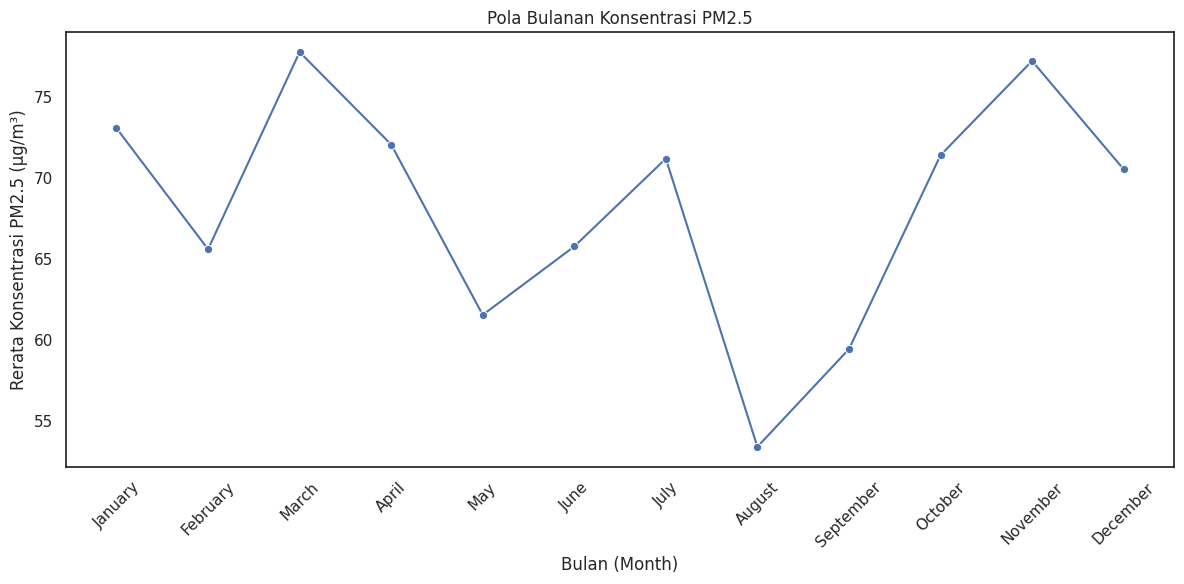

In [49]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="white")
sns.lineplot(x=monthly_pm25_pattern.index, y=monthly_pm25_pattern.values, marker='o')
plt.title('Pola Bulanan Konsentrasi PM2.5')
plt.xlabel('Bulan (Month)')
plt.ylabel('Rerata Konsentrasi PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

**Insight:**
- Konsentrasi `PM2.5` menunjukkan variasi bulanan yang jelas, dengan puncaknya terjadi pada bulan-bulan tertentu.
- Rata-rata kualitas udara sepanjang tahun dapat dikatakan buruk.
- Konsentrasi `PM2.5` mencapai titik tertinggi pada bulan **Maret** (sekitar 77-78 µg/m³), diikuti oleh puncak kedua pada bulan **November**.
- Kualitas udara tampak paling bersih pada bulan **August** (Agustus), di mana konsentrasi turun drastis hingga ke titik terendah (sekitar 53-54 µg/m³).

In [50]:
seasonal_pm25_pattern = df_pm25.groupby('season')['PM2.5'].mean()
# Define the correct order for seasons
season_order = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
seasonal_pm25_pattern = seasonal_pm25_pattern.reindex(season_order)
print("Rata-rata konsentrasi PM2.5 per musim:\n", seasonal_pm25_pattern.head())

Rata-rata konsentrasi PM2.5 per musim:
 season
Musim Semi      70.317691
Musim Panas     63.442772
Musim Gugur     69.188041
Musim Dingin    69.898904
Name: PM2.5, dtype: float64


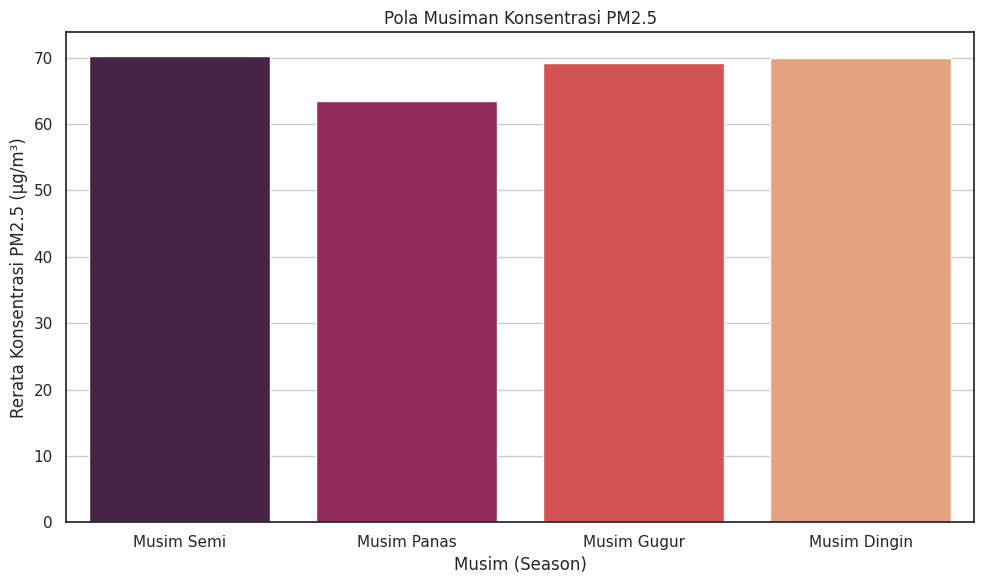

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_pm25_pattern.index, y=seasonal_pm25_pattern.values, palette='rocket', hue=seasonal_pm25_pattern.index, legend=False)
plt.title('Pola Musiman Konsentrasi PM2.5')
plt.xlabel('Musim (Season)')
plt.ylabel('Rerata Konsentrasi PM2.5 (µg/m³)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight**:
- Musim Semi (Spring): Memiliki rata-rata konsentrasi `PM2.5` tertinggi di antara keempat musim, yaitu mencapai angka **70.31 µg/m³**.

- Musim Panas (Summer): Memiliki rata-rata konsentrasi terendah, berada di kisaran **63.44 µg/m³**.

- Musim Gugur (Autumn): Mengalami kenaikan kembali dibandingkan musim panas, dengan konsentrasi sekitar **69.18 µg/m³**.

- Musim Dingin (Winter): Memiliki tingkat polusi yang hampir sama tingginya dengan musim semi, yaitu sekitar **69.89 µg/m³**.

### Pertanyaan 3: Seberapa sering kualitas udara berada pada kategori tidak sehat berdasarkan standar PM2.5?

**Subtask:**
Membuat fungsi untuk mengkategorikan nilai PM2.5 ke dalam kategori kualitas udara (Baik, Sedang, Tidak Sehat (Sensitif), Tidak Sehat, Sangat Tidak Sehat) berdasarkan rentang yang telah ditentukan.


In [52]:
def categorize_pm25(pm25_value):
    if 0 <= pm25_value <= 12:
        return 'Baik'
    elif 12.1 <= pm25_value <= 35.4:
        return 'Sedang'
    elif 35.5 <= pm25_value <= 55.4:
        return 'Tidak Sehat (Sensitif)'
    elif 55.5 <= pm25_value <= 150.4:
        return 'Tidak Sehat'
    elif pm25_value > 150.4:
        return 'Sangat Tidak Sehat'
    else:
        return 'Tidak Diketahui' # Untuk nilai PM2.5 yang tidak masuk kategori di atas atau negatif

**Alasan**:
Step ini akan mengkategorikan data dari fitur PM2.5 menjadi 5 Kategori untuk melihat seberapa banyak data perkategorinya.



In [53]:
df_pm25['PM2.5_category'] = df_pm25['PM2.5'].apply(categorize_pm25)
df_pm25.head()

,year,month,day,hour,PM2.5,station,latitude,longitude,day_name,month_name,avg_PM2.5,season,PM2.5_category
0,2013,3,1,0,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi,Baik
1,2013,3,1,1,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi,Baik
2,2013,3,1,2,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi,Baik
3,2013,3,1,3,6.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi,Baik
4,2013,3,1,4,5.0,Tiantan,39.88665,116.40722,Friday,March,82.255892,Musim Semi,Baik


**Penjelasn**:
Fungsi ini akan membuat satu fitur baru yang akan dimasukan kedalam dataframe `df_pm25` dengan mengkategorikan data pada rentang tertentu yang ada di fungsi yang telah di definiskan sebelumnya.



In [54]:
pm25_catCounts = df_pm25['PM2.5_category'].value_counts()
pm25_catPercentages = df_pm25['PM2.5_category'].value_counts(normalize=True) * 100

print("Frekuensi Kategori Kualitas Udara PM2.5:")
print(pm25_catCounts)
print("\nPersentase Kategori Kualitas Udara PM2.5:")
print(pm25_catPercentages)

unhealthy_categories = ['Tidak Sehat (Sensitif)', 'Tidak Sehat', 'Sangat Tidak Sehat']
unhealthy_counts = pm25_catCounts[pm25_catCounts.index.isin(unhealthy_categories)].sum()
unhealthy_percentages = pm25_catPercentages[pm25_catPercentages.index.isin(unhealthy_categories)].sum()

print(f"\nJumlah data dalam kategori tidak sehat: {unhealthy_counts}")
print(f"Persentase total dalam kategori tidak sehat: {unhealthy_percentages:.2f}%")

Frekuensi Kategori Kualitas Udara PM2.5:
PM2.5_category
Tidak Sehat               145361
Sedang                     92716
Baik                       64094
Tidak Sehat (Sensitif)     54303
Sangat Tidak Sehat         45126
Name: count, dtype: int64

Persentase Kategori Kualitas Udara PM2.5:
PM2.5_category
Tidak Sehat               36.195468
Sedang                    23.086653
Baik                      15.959661
Tidak Sehat (Sensitif)    13.521663
Sangat Tidak Sehat        11.236554
Name: proportion, dtype: float64

Jumlah data dalam kategori tidak sehat: 244790
Persentase total dalam kategori tidak sehat: 60.95%


**Insight**:
- Dari data tersebut diketahui bahwa berdasarkan data yang diambil dari 12 station persentase data tidak sehat nya sebesar **60.95%**
- Frekuensi data yang memiliki kategori `Tidak Sehat` sebanyak **244.790** data



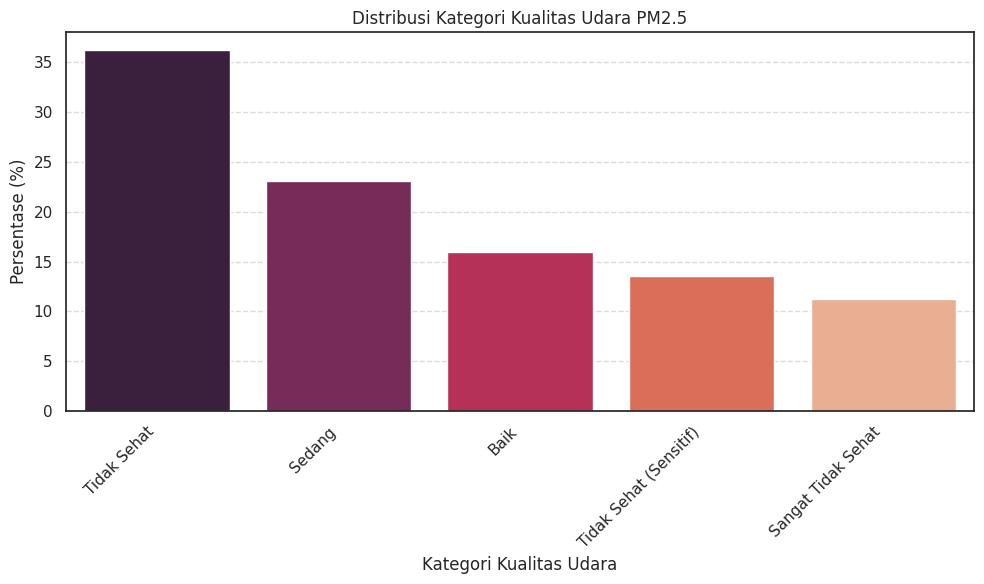

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pm25_catPercentages.index, y=pm25_catPercentages.values, palette='rocket', hue=pm25_catPercentages.index, legend=False)
plt.title('Distribusi Kategori Kualitas Udara PM2.5')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Kualitas udara seringkali berada dalam kategori tidak sehat berdasarkan standar PM2.5. Berdasarkan analisis, **60.95%** dari total data `PM2.5` masuk dalam kategori tidak sehat (`Tidak Sehat (Sensitif)`, `Tidak Sehat`, dan `Sangat Tidak Sehat`).
  - Secara rinci:
    - **36.19%** dari waktu, kualitas udara berada pada kategori `Tidak Sehat`.
    - **13.52%** dari waktu, kualitas udara berada pada kategori `Tidak Sehat (Sensitif)`.
    - **11.23%** dari waktu, kualitas udara berada pada kategori `Sangat Tidak Sehat`.
- Sisanya, **23.08%** berada dalam kategori `Sedang` dan **15.95%** dalam kategori `Baik`.
- Ini menunjukkan bahwa penduduk di daerah yang dicakup oleh dataset ini sering terpapar kualitas udara yang buruk, dengan lebih dari setengah waktu pengukuran menunjukkan tingkat `PM2.5` yang berpotensi membahayakan kesehatan.

## Conclusion

**Conclusion from Question 1:**
- Berdasarkan data tersebut daerah yang paling berisiko atau memiliki kualitas udara yang paling buruk berdasarkan rerata tingkat konsentrasi `PM2.5` yaitu `Dongsi` sebesar **71.63 µg/m³**, lalu disusul `Gucheng` sebesar **71.41 µg/m³**.

- Dari 12 station pemantauan kualitas udara **Dingling** memiliki rerata tingkat konsentrasi `PM2.5` **terendah** sebesar **58.12 µg/m³**, namun diangka tersebut data masih menunjukan jika tingkat terendahpun masih dalam kategori yang `Tidak Sehat`.

**Conclusion from Question 2:**
- Konsentrasi `PM2.5` setelah cenderung mengalami penurunan di pagi hari (mulai jam 00 - 06) pagi setelah itu mengalami kenaikan dijam (07 - 09 pagi) kemungkinan dikarenakan aktivitas dipagi hari padat dijam tersebut. Pola ini kemungkinan disebabkan oleh kombinasi beberapa faktor seperti aktivitas kendaraan di jam sibuk pagi dan sore.

- Rata-rata kualitas udara sepanjang tahun dapat dikatakan buruk.
-Konsentrasi `PM2.5` mencapai titik tertinggi pada bulan **Maret** (sekitar 77-78 µg/m³), diikuti oleh puncak kedua pada bulan **November**. Kualitas udara tampak paling bersih pada bulan **August** (Agustus), di mana konsentrasi turun drastis hingga ke titik terendah (sekitar 53-54 µg/m³).

- Dari data tersebut juga diketahui bahwa diantara 4 musim yang ada di China, Musim Semi memiliki tingkat konsentrasi `PM2.5` tertinggi diangka **70.31 µg/m³**. Musim Panas memliki rata-rata konsentrasi terendah diangka **63.44 µg/m³**.


**Conclusion from Question 3:**
- Dari data ini ternyata diketahui bahwa terdapat **244.790** data yang menunjukan bahwa kualitas udara yang dihitung berdasarkan `PM2.5` berkategori `Tidak Sehat`. Lalu berdasarkan kategori yang dinyatakan tidak sehat sebesar **60.95%** dari kualitas udara yang berada di 12 station pemantauan.